In [1]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import numpy as np

In [32]:
#load audio
voice_file = "you-call-that-fun.wav"
ipd.Audio(voice_file)

In [28]:
voice,sample_rate = librosa.load(voice_file)
# sr je 22050 For many speech-related applications, such as telephony or voice recording.Speech signals typically do not require the wide frequency range that music or high-fidelity audio does.

In [ ]:
#duration of 1 sample
sample_duration = 1/sample_rate
print(f"One sample lasts for {sample_duration:6f} seconds")

# duration of debussy audio in seconds
total_samples = len(voice)
duration = 1 / sample_rate * total_samples
print(f"The audio lasts for {duration} seconds")

One sample lasts for 0.000045 seconds
The audio lasts for 4.50453514739229 seconds


# Анализа у временском домену


Text(0.5, 1.0, 'Talasni oblik')

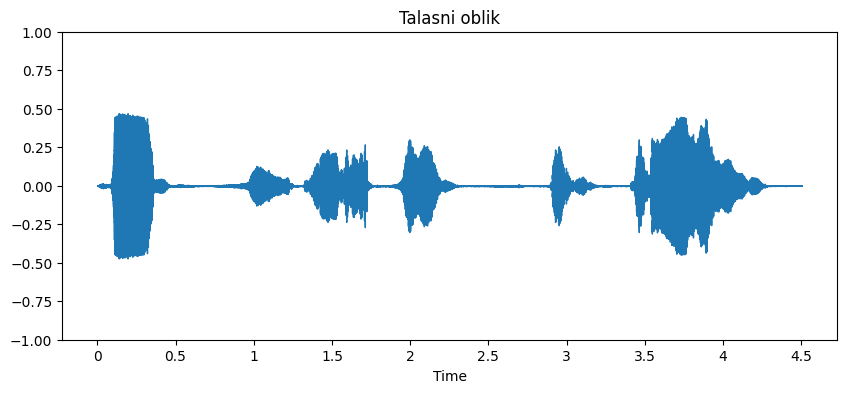

In [4]:
# Приказати таласни облик аудио фајла у временском домену.
plt.figure(figsize=(10,4))
librosa.display.waveshow(voice, sr=sample_rate)
plt.ylim((-1,1))  #znamo da ce biti normalizovano
plt.title("Talasni oblik")

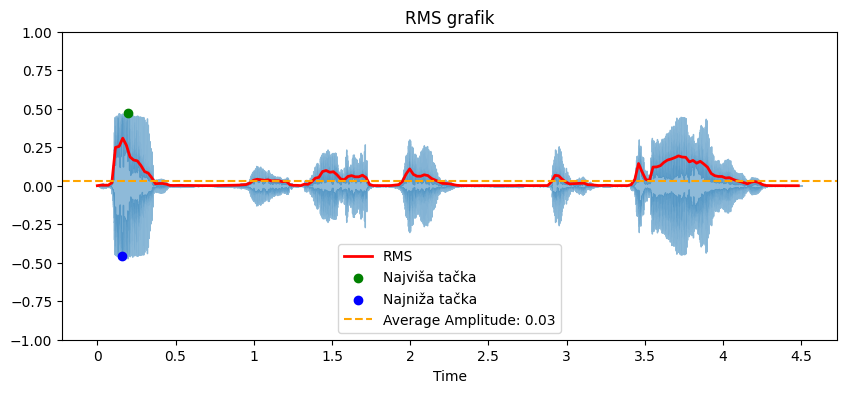

In [13]:
# Приказати RMS график, где је величина оквира 256 узорака.
FRAME_LENGTH = 256
rms_voice = librosa.feature.rms(y=voice,frame_length=FRAME_LENGTH)
time = librosa.times_like(rms_voice,sr=sample_rate)
plt.figure(figsize=(10,4))
librosa.display.waveshow(voice,sr=sample_rate,alpha=0.5)
plt.plot(time,rms_voice[0],color='r',linewidth=2,label='RMS')
plt.ylim((-1, 1))
plt.title("RMS grafik")

#print(rms_voice.shape) # isti broj kao amplitude envelope

# Идентификујте и обележите највише и најниже тачке на таласном облику.
# Израчунајте и наведите просечну амплитуду.
max_amplitude_sample = np.argmax(voice)
min_amplitude_sample = np.argmin(voice)
average_amplitude = np.mean(np.abs(voice))

plt.scatter(max_amplitude_sample / sample_rate,voice[max_amplitude_sample], color='g', label='Najviša tačka')
plt.scatter(min_amplitude_sample / sample_rate,voice[min_amplitude_sample], color='b', label='Najniža tačka')
plt.axhline(y=average_amplitude, color='orange', linestyle='--', label=f'Average Amplitude: {average_amplitude:.2f}')

plt.legend(loc = 'lower center')

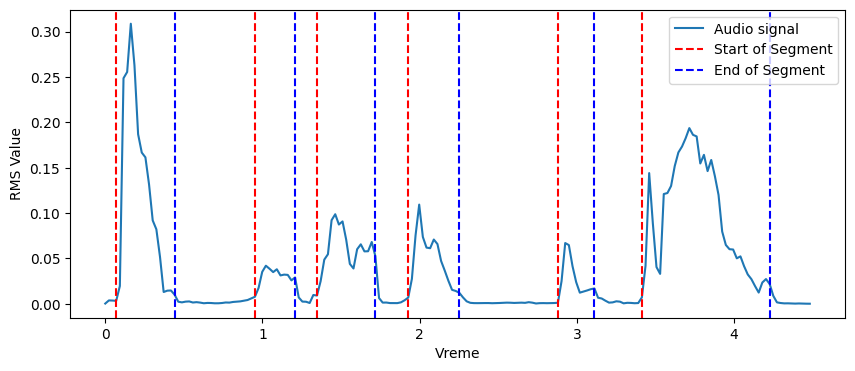

In [21]:
threshold = 0.01

# each segment has (start_index, end_index)
starts = []
ends = []

start_index = 0
end_index = 0

minimum_window_size = np.ceil(len(time)*0.02)

# Finding parts of the audio that are louder than the treshold
for idx, value in enumerate(rms_voice[0]):
    if value > threshold:
        end_index = idx
    else:
        if end_index - start_index > 0 and end_index - start_index > minimum_window_size:
            starts.append(start_index)
            ends.append(end_index)
        start_index = idx

plt.figure(figsize=(10,4))
plt.plot(time, rms_voice[0], label='Audio signal')
plt.xlabel('Vreme')
plt.ylabel('RMS Value')

add_label = True

# Mark the start and end of each segment
for start, end in zip(starts, ends):
    if add_label:
        plt.axvline(x=time[start], color='red', linestyle='--', label='Start of Segment')
        plt.axvline(x=time[end], color='blue', linestyle='--', label='End of Segment')
        add_label = False
    else:
        plt.axvline(x=time[start], color='red', linestyle='--')
        plt.axvline(x=time[end], color='blue', linestyle='--')

plt.legend()
plt.show()



Text(0, 0.5, 'Stopa nule prelaza')

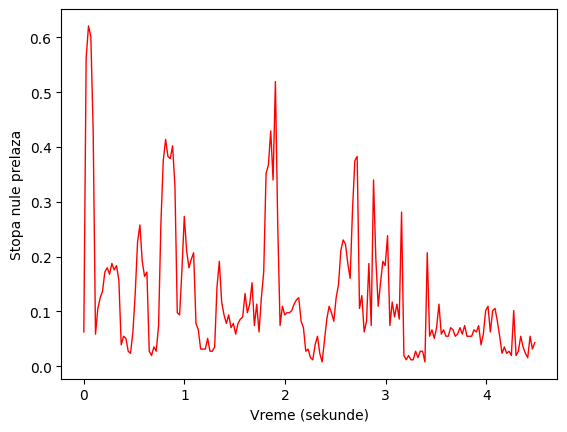

In [16]:
# Стопа преласка преко нуле Израчунајте стопу преласка сигнала преко нуле за унети фајл. Приказати
# резултат на графику, где је оквир величине 256 узорака.

zero_crossings = librosa.feature.zero_crossing_rate(y=voice,frame_length=FRAME_LENGTH)
time_zero_crossings = librosa.times_like(zero_crossings,sr=sample_rate)

plt.plot(time_zero_crossings, zero_crossings[0], color='r', lw=1)
plt.xlabel("Vreme (sekunde)")
plt.ylabel("Stopa nule prelaza")

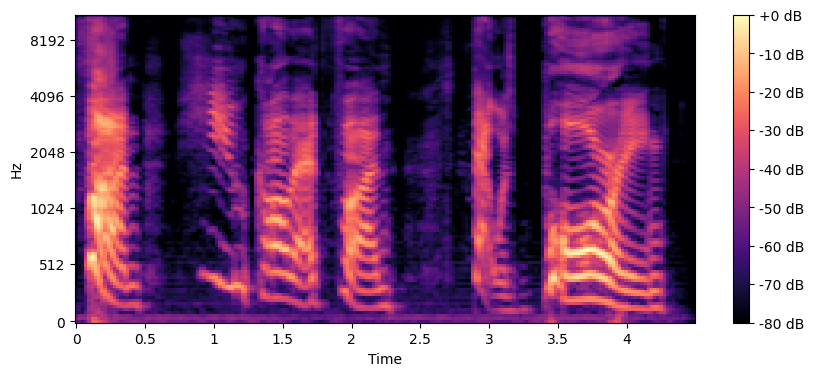

In [23]:
# 2.1.Приказ спектрограма

spectrogram = librosa.feature.melspectrogram(y=voice,sr=sample_rate)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10,4))
librosa.display.specshow(spectrogram_db,x_axis='time', y_axis='mel',sr=sample_rate)
plt.colorbar(format='%+2.0f dB')

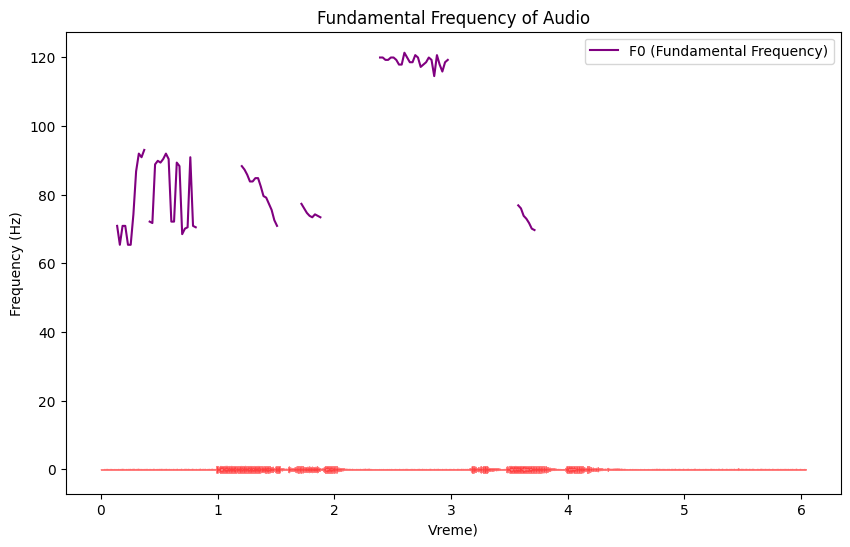

In [33]:
#Пронаћи и обележити основну фреквенцу (fundamental) датког звука на графику.
fundamental_frequency, voiced_flag, voiced_probs = librosa.pyin(voice,fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
time3 = librosa.times_like(fundamental_frequency)

plt.figure(figsize=(10, 6))
librosa.display.waveshow(voice, alpha=0.5, color='red')
plt.plot(time3, fundamental_frequency, label='F0 (Fundamental Frequency)', color='purple')
plt.title('Fundamental Frequency of Audio')
plt.xlabel('Vreme)')
plt.ylabel('Frequency (Hz)')
plt.legend()